# Models overview, nearest-neighbor, naive bayes

Follow _Introduction to Machine Learning_ [Chapter 2](https://github.com/amueller/introduction_to_ml_with_python/blob/master/02-supervised-learning.ipynb)
- 2.5 Summary and Outlook 
- 2.3.2 k-Nearest Neighbors 
- 2.3.4 Naive Bayes Classifiers

There is more information on Naive Bayes in _Python Data Science Handbook_ Chapter 5 In-Depth: Naive Bayes Classification



In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import mglearn

In [3]:
import warnings
warnings.filterwarnings(action='ignore')

## Nearest neighbor
### Idea
**Training:** Memorize the data

**Prediction:** Find the _closest_ points using a distance metric.

### Classification

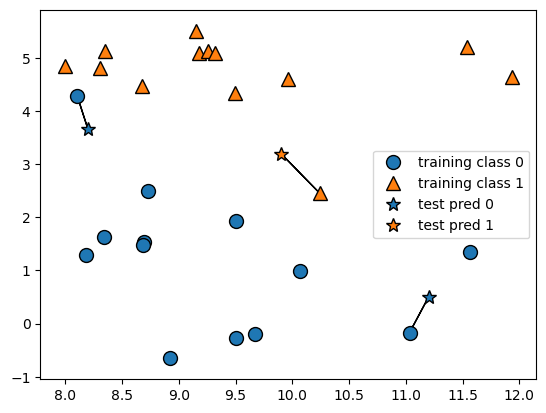

In [4]:
mglearn.plots.plot_knn_classification(n_neighbors=1)

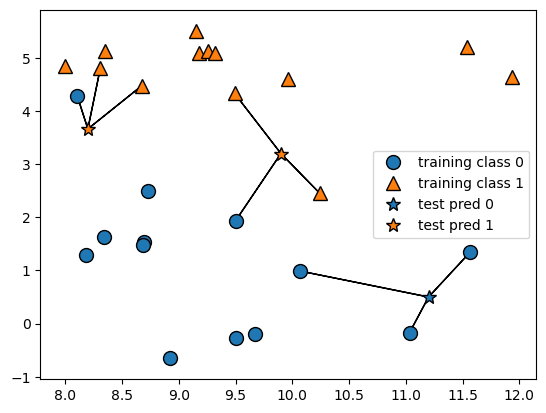

In [5]:
mglearn.plots.plot_knn_classification(n_neighbors=3)

### Increasing neighbors decreases complexity

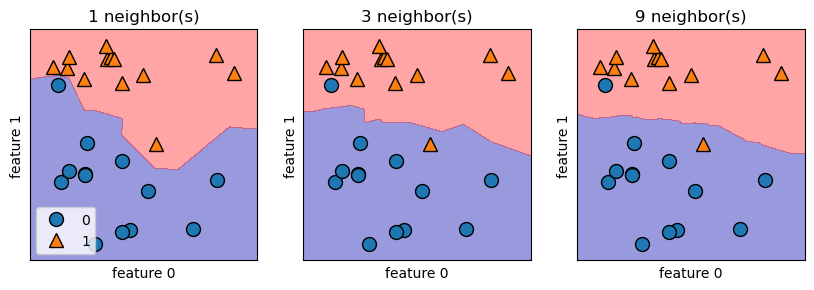

In [6]:
from sklearn.model_selection import train_test_split
X, y = mglearn.datasets.make_forge()

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

from sklearn.neighbors import KNeighborsClassifier

fig, axes = plt.subplots(1, 3, figsize=(10, 3))

for n_neighbors, ax in zip([1, 3, 9], axes):
    # the fit method returns the object self, so we can instantiate
    # and fit in one line
    clf = KNeighborsClassifier(n_neighbors=n_neighbors).fit(X, y)
    mglearn.plots.plot_2d_separator(clf, X, fill=True, eps=0.5, ax=ax, alpha=.4)
    mglearn.discrete_scatter(X[:, 0], X[:, 1], y, ax=ax)
    ax.set_title("{} neighbor(s)".format(n_neighbors))
    ax.set_xlabel("feature 0")
    ax.set_ylabel("feature 1")
axes[0].legend(loc=3)

### Model Generalization 

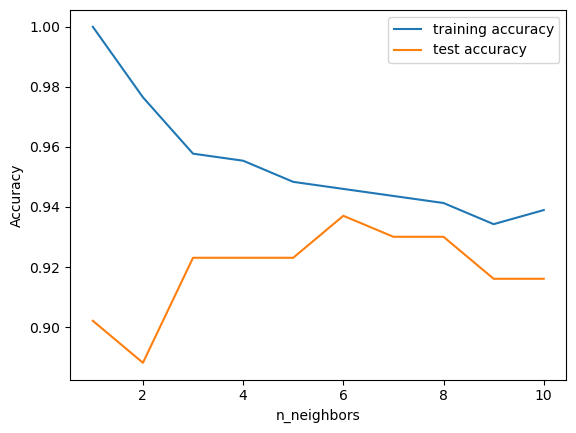

In [7]:
from sklearn.datasets import load_breast_cancer

cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(
    cancer.data, cancer.target, stratify=cancer.target, random_state=66)

training_accuracy = []
test_accuracy = []
# try n_neighbors from 1 to 10
neighbors_settings = range(1, 11)

for n_neighbors in neighbors_settings:
    # build the model
    clf = KNeighborsClassifier(n_neighbors=n_neighbors)
    clf.fit(X_train, y_train)
    # record training set accuracy
    training_accuracy.append(clf.score(X_train, y_train))
    # record generalization accuracy
    test_accuracy.append(clf.score(X_test, y_test))

plt.plot(neighbors_settings, training_accuracy, label="training accuracy")
plt.plot(neighbors_settings, test_accuracy, label="test accuracy")
plt.ylabel("Accuracy")
plt.xlabel("n_neighbors")
plt.legend();

### Regression

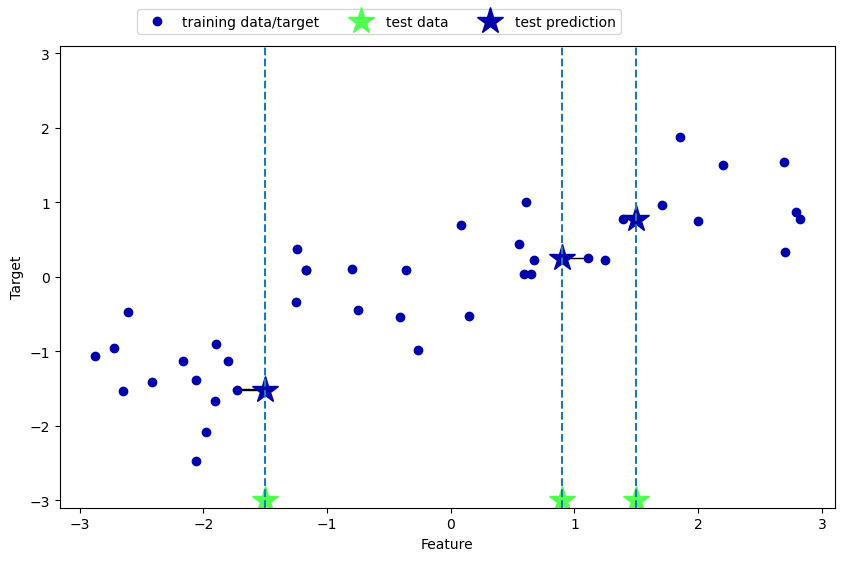

In [8]:
mglearn.plots.plot_knn_regression(n_neighbors=1)

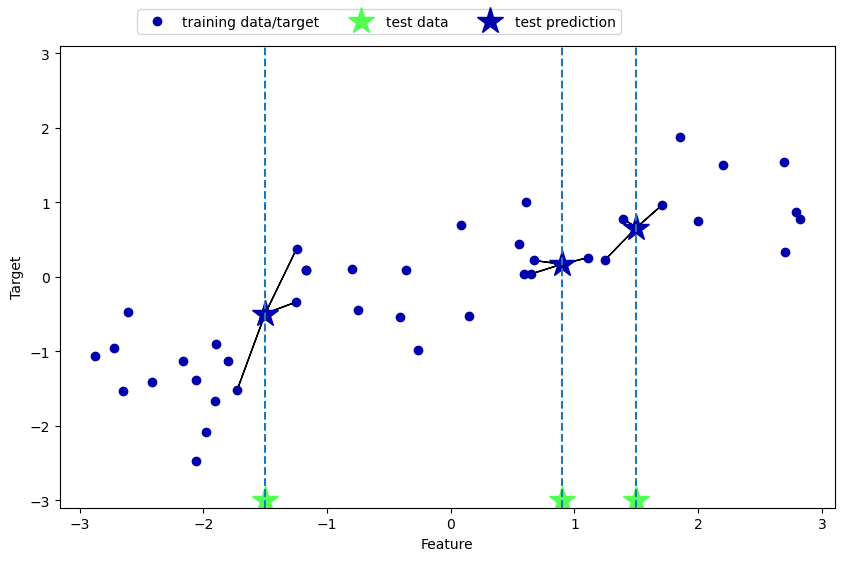

In [9]:
mglearn.plots.plot_knn_regression(n_neighbors=3)

In [10]:
from sklearn.neighbors import KNeighborsRegressor

X, y = mglearn.datasets.make_wave(n_samples=40)

# split the wave dataset into a training and a test set
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

# instantiate the model and set the number of neighbors to consider to 3
reg = KNeighborsRegressor(n_neighbors=3)
# fit the model using the training data and training targets
reg.fit(X_train, y_train)
# print the accuracy score for the testing data
print("Test set R^2: {:.2f}".format(reg.score(X_test, y_test)))

Test set R^2: 0.83


Here, the score is 0.83, which indicates a relatively good model fit

### Analyzing K-NN Regression

For our one-dimensional dataset, we can see what the predictions look like for all possible feature values. To do this, we create a test dataset consisting of many points on the x-axis, which corresponds to the single feature:

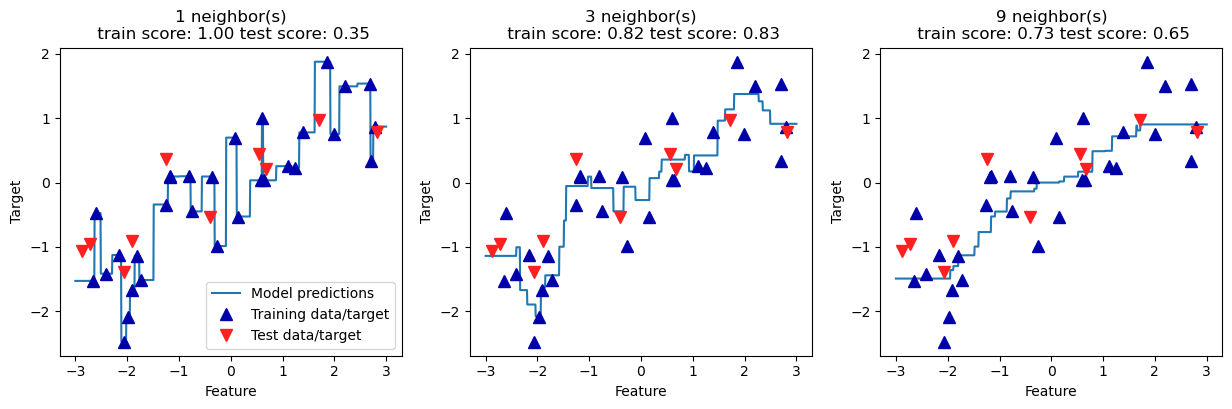

In [11]:
fig, axes = plt.subplots(1, 3, figsize=(15, 4))
# create 1,000 data points, evenly spaced between -3 and 3
line = np.linspace(-3, 3, 1000).reshape(-1, 1)
for n_neighbors, ax in zip([1, 3, 9], axes):
    # make predictions using 1, 3, or 9 neighbors
    reg = KNeighborsRegressor(n_neighbors=n_neighbors)
    reg.fit(X_train, y_train)
    ax.plot(line, reg.predict(line))
    ax.plot(X_train, y_train, '^', c=mglearn.cm2(0), markersize=8)
    ax.plot(X_test, y_test, 'v', c=mglearn.cm2(1), markersize=8)

    ax.set_title(
        "{} neighbor(s)\n train score: {:.2f} test score: {:.2f}".format(
            n_neighbors, reg.score(X_train, y_train),
            reg.score(X_test, y_test)))
    ax.set_xlabel("Feature")
    ax.set_ylabel("Target")
axes[0].legend(["Model predictions", "Training data/target",
                "Test data/target"], loc="best");

## Naive Bayes

Classification only.

Uses [Bayes Theorem](https://en.wikipedia.org/wiki/Bayes%27_theorem):
$$
P(A|B) = \frac{P(B|A)\cdot P(A)}{P(B)}
$$

We want to know $P(L_k|X)$: _probability of label L given a set of features X_ .

Using Bayes theorem we get:
$$
P(L_k|X) = \frac{P(X|L_k)\cdot P(L_k)}{P(X)}
$$

For a different label, the denominator does not change. We can compute the numerator for all labels and pick the one with the highest value.

The **naive** comes in when estimating $P(X|L_k)$ where features in $X$ are independently assessed. 

Have a look at the wikipedia entry for [Naive Bayes](https://en.wikipedia.org/wiki/Naive_Bayes_classifier#Person_classification) for a worked example.

When estimating $P(X|L_k)$, we choose a distribution that matches the type of the feature: continuous, binary, or count data. From scikit-learn:
>There are three kinds of naive Bayes classifiers implemented in scikit-learn: GaussianNB, BernoulliNB, and MultinomialNB. GaussianNB can be applied to any continuous data, while BernoulliNB assumes binary data and MultinomialNB assumes count data (that is, that each feature represents an integer count of something, like how often a word appears in a sentence). BernoulliNB and MultinomialNB are mostly used in text data classification.

Hence, depending on the type of your features, you choose the corresponding type of Naive Bayes.

### Bernouilli Naive Bayes

In [12]:
# Simple example

X = np.array([[0, 1, 0, 1],
              [1, 0, 1, 1],
              [0, 0, 0, 1],
              [1, 0, 1, 0]])
y = np.array([0, 1, 0, 1])

In [13]:
# Count the number of each feature that is non-zero for each class

counts = {}
for label in np.unique(y):
    # iterate over each class
    # count (sum) entries of 1 per feature
    counts[label] = X[y == label].sum(axis=0)
print("Feature counts:\n", counts)

Feature counts:
 {0: array([0, 1, 0, 2]), 1: array([2, 0, 2, 1])}


### Gaussian Naive Bayes

Using code from 
[Python Data Science Handbook Chapter 5](https://github.com/jakevdp/PythonDataScienceHandbook/blob/master/notebooks/05.05-Naive-Bayes.ipynb)



In this classifier, the assumption is that data from each label is drawn from a simple Gaussian distribution. Imagine that you have the following data:

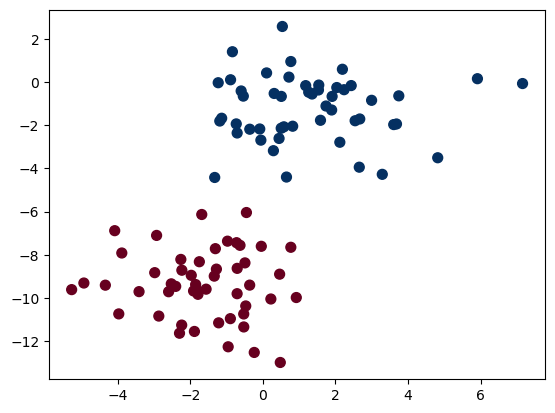

In [14]:
from sklearn.datasets import make_blobs
X, y = make_blobs(100, 2, centers=2, random_state=2, cluster_std=1.5)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='RdBu');

One way to create a simple model is to assume that the data is described by a Gaussian distribution with no covariance between dimensions. We can fit this model by finding the mean and standard deviation of the points within each label

In the code below, can you spot the Gaussian model [Gausian Naive Bayes](https://scikit-learn.org/stable/modules/naive_bayes.html#gaussian-naive-bayes) uses?

red: mu= [-1.64939095 -9.36891451]; std= [1.4356079  1.57390238]
blue: mu= [ 1.29327924 -1.24101221]; std= [1.82528027 1.49131278]


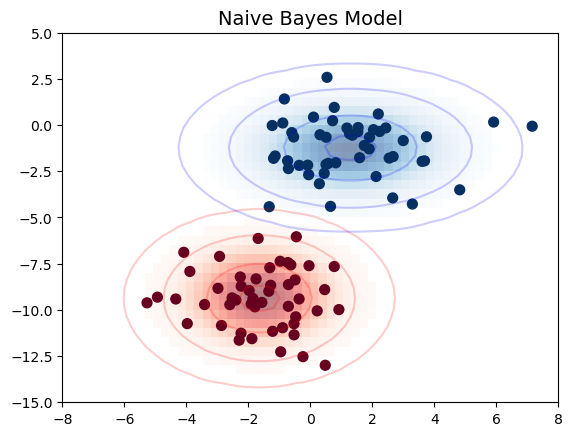

In [15]:
from sklearn.datasets import make_blobs
X, y = make_blobs(100, 2, centers=2, random_state=2, cluster_std=1.5)

fig, ax = plt.subplots()

ax.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='RdBu')
ax.set_title('Naive Bayes Model', size=14)

xlim = (-8, 8)
ylim = (-15, 5)

xg = np.linspace(xlim[0], xlim[1], 60)
yg = np.linspace(ylim[0], ylim[1], 40)
xx, yy = np.meshgrid(xg, yg)
Xgrid = np.vstack([xx.ravel(), yy.ravel()]).T

for label, color in enumerate(['red', 'blue']):
    mask = (y == label)
    # Estimate mean and std for each feature separately
    mu, std = X[mask].mean(0), X[mask].std(0)
    print('{}: mu= {}; std= {}'.format(color, mu, std))
    
    # Gaussian model, multiply feature1 times feature2
    P = np.exp(-0.5 * (Xgrid - mu) ** 2 / std ** 2).prod(1)
    
    Pm = np.ma.masked_array(P, P < 0.03)
    ax.pcolorfast(xg, yg, Pm.reshape(xx.shape), alpha=0.5,
                  cmap=color.title() + 's')
    ax.contour(xx, yy, P.reshape(xx.shape),
               levels=[0.01, 0.1, 0.5, 0.9],
               colors=color, alpha=0.2)
    
ax.set(xlim=xlim, ylim=ylim);

The ellipses here represent the Gaussian generative model for each label, with larger probability toward the center of the ellipses

We can use this model to determine which label is the most probable for a given point

In [16]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(X, y);

In [17]:
rng = np.random.RandomState(0)
Xnew = [-6, -14] + [14, 18] * rng.rand(2000, 2)
ynew = model.predict(Xnew)

The plot below shows the decision boundary for the predictions

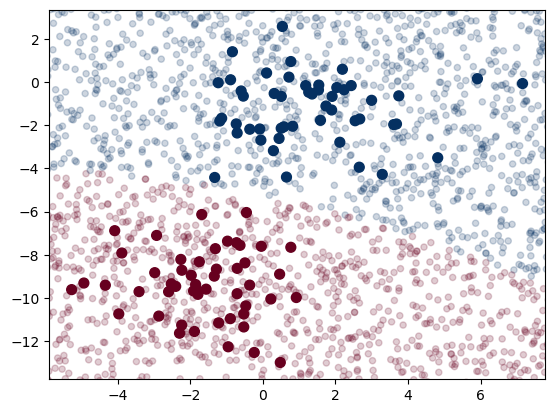

In [18]:
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='RdBu')
lim = plt.axis()
plt.scatter(Xnew[:, 0], Xnew[:, 1], c=ynew, s=20, cmap='RdBu', alpha=0.2)
plt.axis(lim);

We see a slightly curved boundary in the classifications. In general, the boundary in Gaussian naive Bayes is quadratic

## Supervised model summary

### Nearest neighbors
For small datasets, good as a baseline, easy to explain.

### Linear models
Go-to as a first algorithm to try, good for very large datasets, good for very high-dimensional data.

### Naive Bayes
Only for classification. Even faster than linear models, good for very large datasets and high-dimensional data. Often less accurate than linear models.

### Decision trees
Very fast, don’t need scaling of the data, can be visualized and easily explained.

### Random forests
Nearly always perform better than a single decision tree, very robust and powerful. Don’t need scaling of data. Not good for very high-dimensional sparse data.

### Gradient boosted decision trees
Often slightly more accurate than random forests. Slower to train but faster to predict than random forests, and smaller in memory. Need more parameter tuning than random forests.

### Support vector machines
Powerful for medium-sized datasets of features with similar meaning. Require scaling of data, sensitive to parameters.

### Neural networks
Can build very complex models, particularly for large datasets. Sensitive to scaling of the data and to the choice of parameters. Large models need a long time to train.